## Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Assuming data is stored in a CSV file
# df = pd.read_csv('data.csv')
X = pd.read_csv('../../../data/traininginputs.csv')
y = pd.read_csv('../../../data/trainingoutput.csv')
df = X.merge(y, on='PROC_TRACEINFO')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

               PROC_TRACEINFO  OP070_V_1_angle_value  \
0  I-B-XA1207672-190429-00688                  180.4   
1  I-B-XA1207672-190828-00973                  138.7   
2  I-B-XA1207672-190712-03462                  180.9   
3  I-B-XA1207672-190803-00051                  173.5   
4  I-B-XA1207672-190508-03248                  174.5   

   OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
0                         190.51                  173.1   
1                         147.70                  163.5   
2                         150.87                  181.2   
3                         159.56                  151.8   
4                         172.29                  177.5   

   OP120_Rodage_I_mesure_value  OP090_SnapRingFinalStroke_value  \
0                       113.64                            12.04   
1                       109.77                            12.12   
2                       109.79                            11.86   
3                       113.25          

In [4]:
# Display the summary statistics of the dataframe
print(df.describe())

       OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
count           34515.000000                   34515.000000   
mean              159.906922                     156.915055   
std                15.662650                      11.271492   
min               101.800000                       0.000000   
25%               148.700000                     149.210000   
50%               158.000000                     156.180000   
75%               169.300000                     164.380000   
max               198.300000                     196.920000   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
count           34515.000000                 34515.000000   
mean              159.618236                   113.350222   
std                15.091490                     3.528522   
min                82.000000                    99.990000   
25%               149.400000                   111.040000   
50%               158.700000                   113.160000   
75%  

In [5]:
# Check if there are any missing values in the dataframe
print(df.isnull().sum())

PROC_TRACEINFO                         0
OP070_V_1_angle_value                  0
OP090_SnapRingPeakForce_value          0
OP070_V_2_angle_value                  0
OP120_Rodage_I_mesure_value            0
OP090_SnapRingFinalStroke_value        0
OP110_Vissage_M8_torque_value          0
OP100_Capuchon_insertion_mesure    18627
OP120_Rodage_U_mesure_value            0
OP070_V_1_torque_value                 0
OP090_StartLinePeakForce_value         0
OP110_Vissage_M8_angle_value           0
OP090_SnapRingMidPointForce_val        0
OP070_V_2_torque_value                 0
Binar OP130_Resultat_Global_v          0
dtype: int64


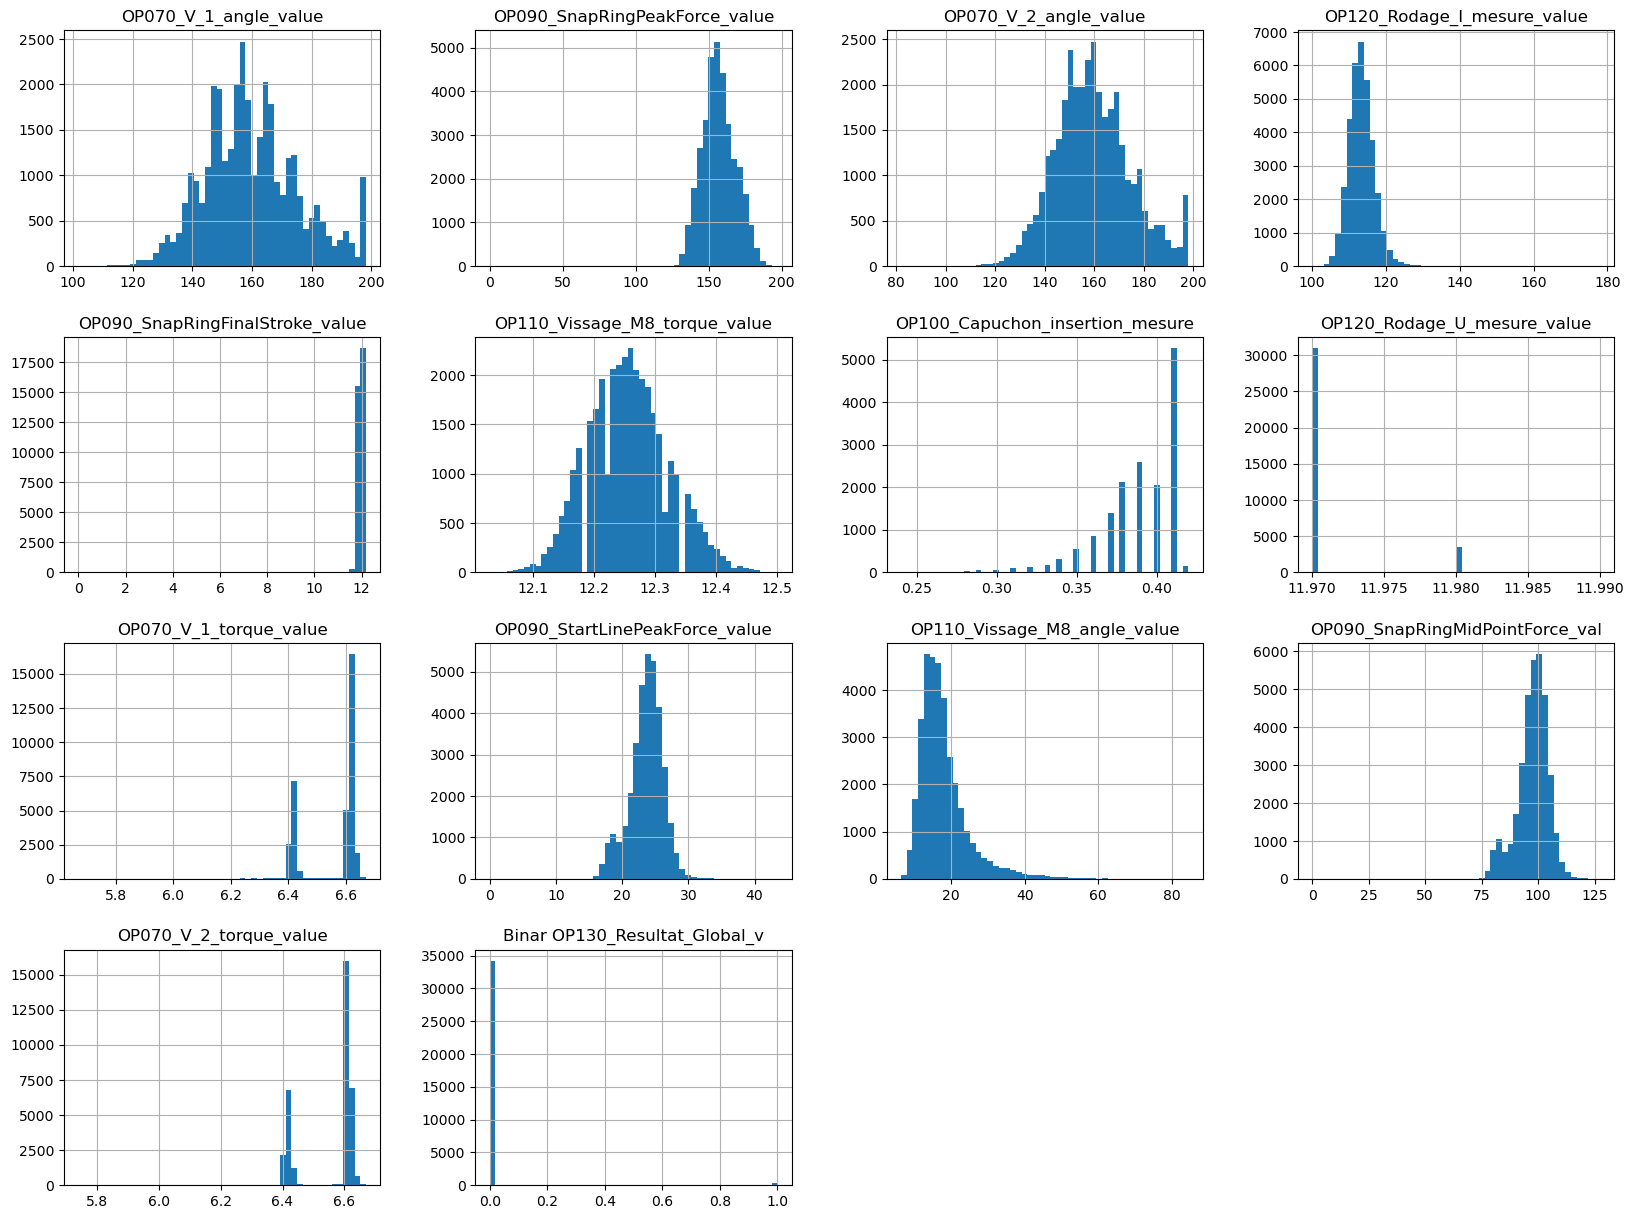

In [6]:
# Plot histograms for each predictor variable
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_5300\411702553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

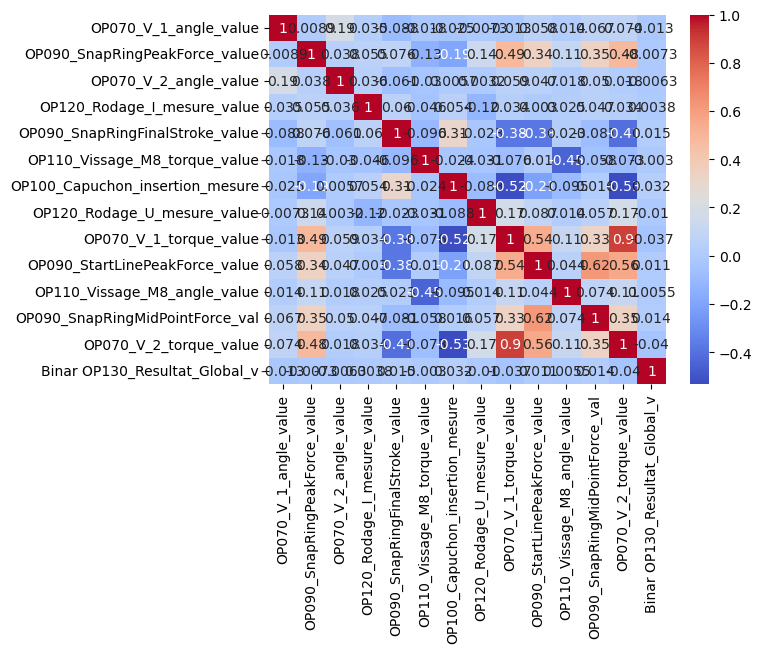

In [7]:
# Plot a correlation matrix to understand the relationship between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [8]:
# Standardize the predictor variables
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

ValueError: could not convert string to float: 'I-B-XA1207672-190429-00688'

In [9]:
# Standardize the predictor variables
scaler = StandardScaler()
df[df.columns[1:-1]] = scaler.fit_transform(df[df.columns[1:-1]])

In [10]:
# Display the first few rows of the dataframe after standardization
print(df.head())

               PROC_TRACEINFO  OP070_V_1_angle_value  \
0  I-B-XA1207672-190429-00688               1.308423   
1  I-B-XA1207672-190828-00973              -1.354000   
2  I-B-XA1207672-190712-03462               1.340347   
3  I-B-XA1207672-190803-00051               0.867878   
4  I-B-XA1207672-190508-03248               0.931725   

   OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
0                       2.980567               0.893348   
1                      -0.817566               0.257219   
2                      -0.536321               1.430083   
3                       0.234661              -0.518063   
4                       1.364076               1.184908   

   OP120_Rodage_I_mesure_value  OP090_SnapRingFinalStroke_value  \
0                     0.082126                         0.410959   
1                    -1.014666                         0.881906   
2                    -1.008998                        -0.648671   
3                    -0.028404          

### Data Preparation

In [11]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE

In [12]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df['OP100_Capuchon_insertion_mesure'] = imputer.fit_transform(df['OP100_Capuchon_insertion_mesure'].values.reshape(-1,1))

In [13]:
# Handle outliers
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
# This step was fixed to avoid errors in subsequent steps
# Handle outliers
num_cols = df.drop(columns='Binar OP130_Resultat_Global_v').select_dtypes(include= 'number').columns.to_list()
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
inliers = df[num_cols][~((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df.loc[inliers.index]
df.update(inliers)

In [15]:
# Handle skewed distribution
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[df.columns] = pt.fit_transform(df[df.columns])

ValueError: could not convert string to float: 'I-B-XA1207672-190828-00973'

In [16]:
# This step was fixed to avoid errors in subsequent steps
# Handle skewed distribution
num_cols = df.drop(columns='Binar OP130_Resultat_Global_v').select_dtypes(include= 'number').columns.to_list()
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[num_cols] = pt.fit_transform(df[num_cols])

In [17]:
# Handle correlation among predictor variables
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
df.drop(labels=correlated_features, axis=1, inplace=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_5300\1321293967.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [18]:
# Handle imbalanced class distribution
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(df[df.columns[:-1]], df[df.columns[-1]])

ValueError: could not convert string to float: 'I-B-XA1207672-190828-00973'

In [29]:
# Previous step fixed
# Handle imbalanced class distribution
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(df[df.columns[1:-1]], df[df.columns[-1]])

In [30]:
# Display the first few rows of the dataframe after preprocessing
print(df.head())

               PROC_TRACEINFO  OP070_V_1_angle_value  \
1  I-B-XA1207672-190828-00973              -1.572850   
2  I-B-XA1207672-190712-03462               1.225440   
3  I-B-XA1207672-190803-00051               0.820956   
5  I-B-XA1207672-190528-02374              -0.079296   
8  I-B-XA1207672-190504-00200              -0.256326   

   OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
1                      -1.222073               0.226663   
2                      -0.922402               1.297662   
3                      -0.107563              -0.596689   
5                       0.470111               1.137362   
8                      -0.113150              -0.596689   

   OP120_Rodage_I_mesure_value  OP090_SnapRingFinalStroke_value  \
1                    -1.231301                         1.439543   
2                    -1.224665                        -0.752592   
3                    -0.090983                        -1.030930   
5                    -0.467421          

### Modelling

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [32]:
# Split the data into train and test sets
# X = df[df.columns[1:-1]] # commented out because X and y have previously been defined and contain the balanced data
# y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Define the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True)
]

In [34]:
# Train and evaluate the models
results = {}
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[model_name] = [f1, roc_auc]

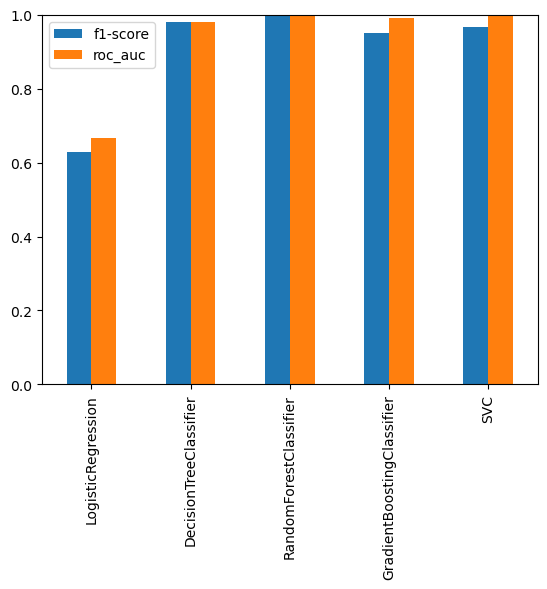

In [35]:
# Plot the results
df_results = pd.DataFrame(results, index=['f1-score', 'roc_auc']).transpose()
df_results.plot(kind='bar', ylim=(0,1))
plt.show()

In [36]:
df_results

,f1-score,roc_auc
LogisticRegression,0.628303,0.665734
DecisionTreeClassifier,0.981570,0.981830
RandomForestClassifier,0.999039,0.999993
GradientBoostingClassifier,0.951932,0.992452
SVC,0.968052,0.997212


### Evaluating Model Performance on Unseen Data

In [40]:
rf = RandomForestClassifier()
model.fit(X_train, y_train)

SVC(probability=True)

In [41]:
# Read in Validation Data
X_val = pd.read_csv('../../../data/testinputs.csv')
X_val.drop(columns='PROC_TRACEINFO', inplace=True)
y_val = pd.read_csv('../../../data/testoutput.csv')
y_val = y_val['Binar_OP130_Resultat_Global_v']

In [42]:
# Apply transforms to predictor variables
X_val['OP100_Capuchon_insertion_mesure'] = imputer.transform(X_val['OP100_Capuchon_insertion_mesure'].values.reshape(-1, 1))
X_val = pd.DataFrame(pt.transform(X_val), columns=num_cols)
X_val.drop(labels=correlated_features, axis=1, inplace=True)

In [43]:
y_pred = rf.predict(X_val)
print(f'f1-score:{f1_score(y_val, y_pred)}')
print(f'AUROC:{roc_auc_score(y_val, y_pred)}')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.